### Insights
   Following are the insights from this classification project:

• The dataset has all the features except ('Points' & 'Price') to be as categorical 'object' data types.

• It is imperative that there's a lot of valuable information imbibed in the 'review_description' column as it captures the essence of wine ingredients, quality, origin & many other   features of a particular wine that is produced all around the globe. This 'review_description' feature is invaluable when used with techniques such as Natural Language Processing     (NLP) to decipher the relationship between the character embeddings.

• There are few most expensive wines that come from France & USA & the costliest being from France.

• Dropping just 0.59% of the data from the 'Price' column brings its normality back. There are few outliers that oppose this effect.

• Most good wines come from England. England provided information only on best wines & it is among the top wine consuming nations.

• Wines in Switzerland are the most expensive ones as cost of living is usually high and they have a profound effect on the dataset.

### Summary
In this notebook, a predictive model for predicting the wine “variety” using multiclass classification by an open source categorical gradient boosting library called CatBoost. Model is CatBoost Multiclassifier with learning rate as 1 and for 50 iterations. Features extracted are ('country', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'winery'). Target is 'variety'. We splitted the training dataset into train & validation sets for model evaluation and found the score on training set to be '0.25'.


### Learnings
After some research, it is quite imperative that we could use more advanced machine learning techniques especially in the text processing area such as NLP & deep neural network architechtures such as LSTM( Long Short Term Memory ) to combine the speed & memory advantage to predict better solutions.

#### The Data Description:
    • user_name - user_name of the reviewer
    • country -The country that the wine is from.
    • review_title - The title of the wine review, which often contains the vintage.
    • review_description - A verbose review of the wine.
    • designation - The vineyard within the winery where the grapes that made the wine are from.
    • points - ratings given by the user. The ratings are between 0 -100.
    • price - The cost for a bottle of the wine
    • province - The province or state that the wine is from.
    • region_1 - The wine-growing area in a province or state (ie Napa).
    • region_2 - Sometimes there are more specific regions specified within a wine-growing area (ie Rutherford inside the Napa Valley),but this value can sometimes be blank.
    • winery - The winery that made the wine
    • variety - The type of grapes used to make the wine. Dependent variable for task 2 of the assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/home/sai_vyas/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
/home/sai_vyas/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('/home/sai_vyas/Desktop/KnightMLData/train.csv')
test = pd.read_csv('/home/sai_vyas/Desktop/KnightMLData/test.csv')

In [3]:
test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [4]:
train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [5]:
train['price'].value_counts().head()

20.0    4206
15.0    3627
25.0    3596
30.0    3127
18.0    2886
Name: price, dtype: int64

Dropping unwanted columns. Out of these 'review_description' is quite useful if we are using NLP methods for prediction. That column itself is enough to predict sometimes given the fact, that it has all the information needed for a wine variety classification.

In [6]:
train[train.duplicated(['review_description','review_title'])].shape

(5016, 12)

Deleting the duplicates

In [7]:
train = train.drop_duplicates(['review_description','review_title'])
train.reset_index(drop=True,inplace=True)
train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [8]:
test[test.duplicated(['review_description','review_title'])].shape

(314, 11)

In [9]:
test.drop_duplicates(['review_description','review_title'], inplace=True)
test.reset_index(drop=True, inplace=True)
test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [10]:
train.isnull().sum()

user_name             18536
country                  33
review_title              0
review_description        0
designation           22183
points                    0
price                  5285
province                 33
region_1              11961
region_2              43827
winery                    0
variety                   0
dtype: int64

In [11]:
test.isnull().sum()

user_name              4681
country                   3
review_title              0
review_description        0
designation            5901
points                    0
price                  1374
province                  3
region_1               3255
region_2              11566
winery                    0
dtype: int64

Lot of missing values both in train & test data sets. Imputation leads to heavier approximations by the models in the later stage. We either have to delete columns of least importance. 'user_name', 'designation', 'price', 'region_1', 'region_2' has the most NaN values. Out of this only 'price' is an integer valued column. Let's delete missing rows in it first.

In [12]:
train.dropna(subset=['price'], inplace=True)
train.reset_index(drop=True,inplace=True)
test.dropna(subset=['price'],inplace=True)
test.reset_index(drop=True, inplace=True)

In [13]:
train[(train['price'] > 2000)]
#test[test['price'] > 2200]

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
27135,@mattkettmann,US,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Blair,Chardonnay
53643,@vossroger,France,Château les Ormes Sorbet 2013 Médoc,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Château les Ormes Sorbet,Bordeaux-style Red Blend
56404,@vossroger,France,Château Pétrus 2014 Pomerol,The wine is a velvet glove in an iron fist. Th...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Château Pétrus,Bordeaux-style Red Blend


Lot of variance among the top 3 expensive wines. These could be outliers for our data if they are sparsely distributed.

### Basic EDA & Feature Engineering.
This section is quite important in any data science project where the real insights among the data are postulated and forms a basis for decision making in the later stages. We also derive best features & create them if necessary and is called as feature engineering before proceeding to build our machine learning models.

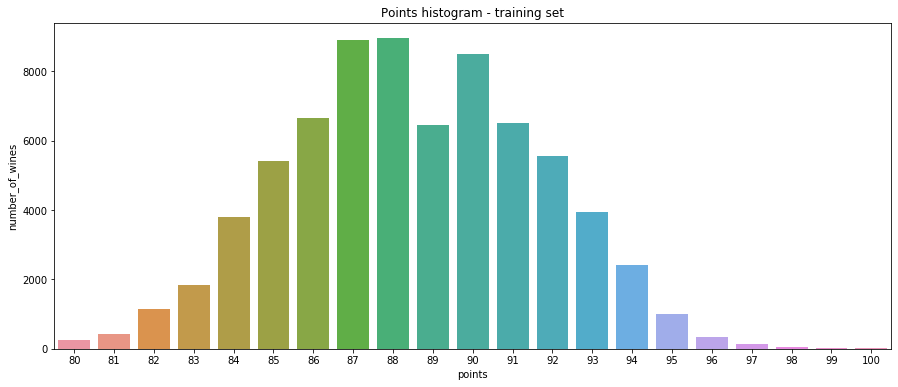

In [14]:
def pastel_plot(data, x, y):
    plt.figure(figsize = (15,6))
    plt.title('Points histogram - training set')
    sns.set_color_codes("pastel")
    sns.barplot(x = x, y=y, data=df)
    locs, labels = plt.xticks()
    plt.show()
t = train['points'].value_counts()
df = pd.DataFrame({'points': t.index,
                   'number_of_wines': t.values
                  })

pastel_plot(df,'points', 'number_of_wines')

The data follows a normal distribution with most of them centered around 88

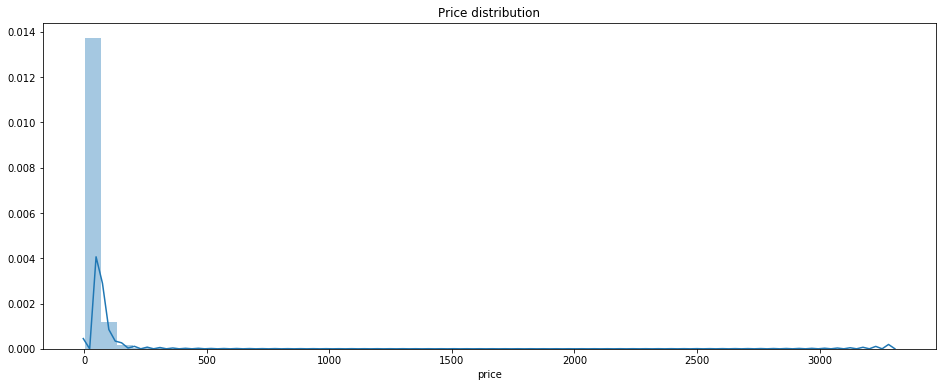

In [15]:
plt.figure(figsize=(16,6))
plt.title('Price distribution')
ax = sns.distplot(train['price'])

Distribution is not uniform with large tails. We can scale the data & see how it looks like.

0.659240422356128 % of wines are more expensive than 200 USD


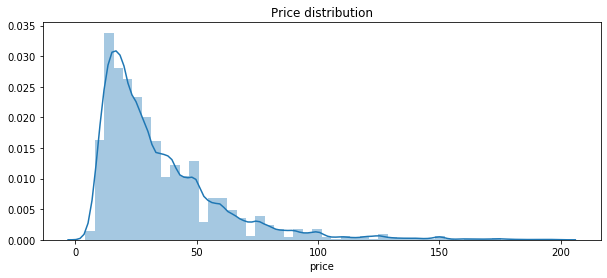

In [16]:
plt.figure(figsize=(10,4))
plt.title('Price distribution')
ax = sns.distplot(train[train["price"]<200]['price'])

percent=train[train['price']>200].shape[0]/train.shape[0]*100
print("{} % of wines are more expensive than 200 USD".format(percent))

Dropping just 0.59% of the data brings its normality back.

#### Plots based on various attributes

Country wise

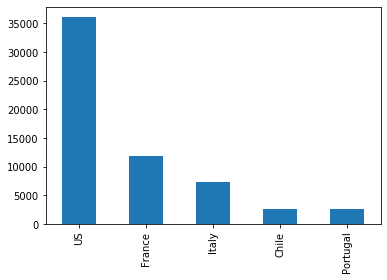

In [17]:
c = train['country'].value_counts()
c = c.iloc[0:5]
c.plot(kind='bar')

Variety wise

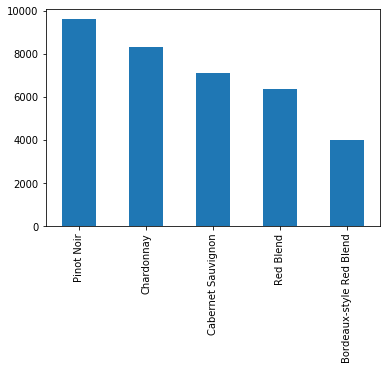

In [18]:
v = train['variety'].value_counts()
v = v.iloc[0:5]
v.plot(kind='bar')

Winery wise

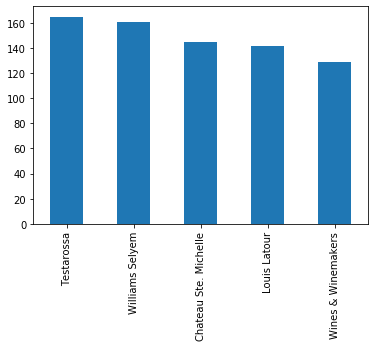

In [19]:
w= train['winery'].value_counts()
w = w.iloc[0:5]
w.plot(kind='bar')

Points wise. 12 wine reviews gave best points as 100. These are the best reviews received.

In [20]:
p = train['points']
best = p == 100
train[best].shape

(12, 12)

Filtered through best prices for wines

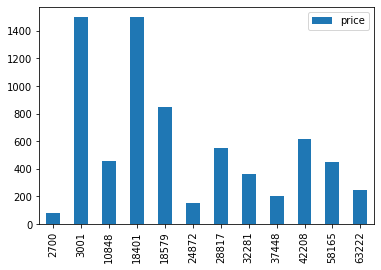

In [21]:
train[best]['price'].plot(kind='bar', legend=True)

Filtered through best wine varities

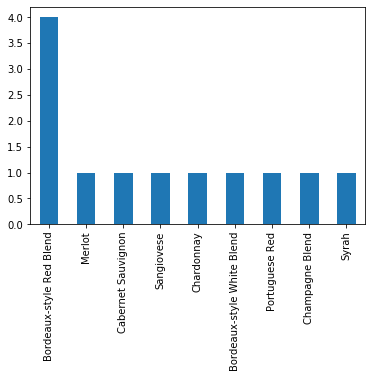

In [22]:
kind = train[best]['variety'].value_counts()
kind.plot(kind='bar')

Filetered through best wine producing nations

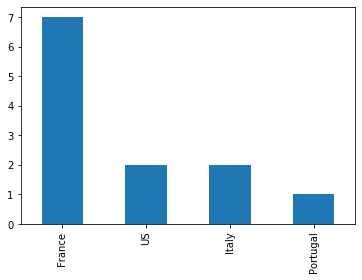

In [23]:
nation = train[best]['country'].value_counts()
nation.plot(kind='bar')

Sorting the countries with expensive wines & high ratings.

In [24]:
z=train.groupby(['country'])['price','points'].mean().reset_index().sort_values('price',ascending=False)
z[['country','price']].head(10)

/home/sai_vyas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,country,price
33,Switzerland,94.750000
10,England,51.538462
18,Italy,46.738333
13,Germany,44.724688
11,France,44.122072
35,US,37.568786
29,Serbia,34.666667
5,Canada,33.470199
17,Israel,32.914676
2,Austria,31.970490


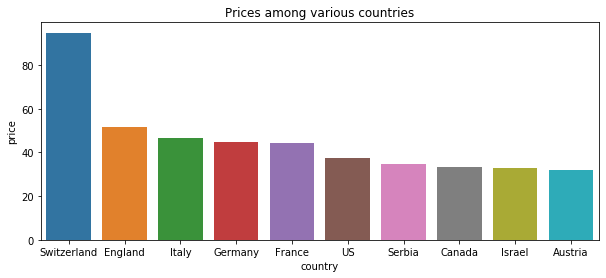

In [25]:
plt.figure(figsize = (10,4))
plt.title('Prices among various countries')
sns.barplot(x = 'country', y='price', data=z.head(10))
locs, labels = plt.xticks()
plt.show()

Sorting with highest ratings among them

In [26]:
z=z.sort_values('points', ascending=False)
z[['country','points']].head(10)

,country,points
10,England,91.538462
2,Austria,90.454058
13,Germany,90.045076
5,Canada,89.331126
18,Italy,89.051254
16,India,89.000000
24,Morocco,88.842105
11,France,88.771104
35,US,88.612594
17,Israel,88.511945


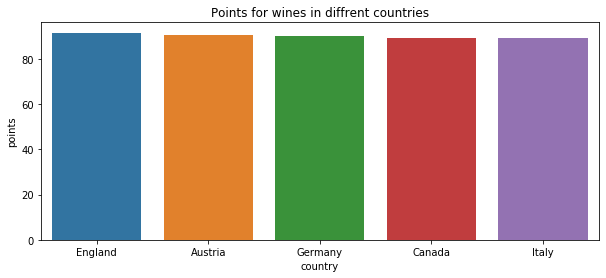

In [27]:
plt.figure(figsize = (10,4))
plt.title('Points for wines in diffrent countries')
sns.set_color_codes('pastel')
sns.barplot(x = 'country', y='points', data=z.head(5))
locs, labels = plt.xticks()
plt.show()

Wines in Switzerland are the most expensive ones as cost of living is usually high. The highest mean of points came to England based on our data, and following reasonates with why so

    Most good wines come from England.
    England provided information only on best wines
    It is among the top wine consuming nations
Analysis of country wise wine number,

US              36112
France          11870
Italy            7414
Chile            2708
Portugal         2642
Spain            2541
Argentina        2400
Austria          1491
Germany          1442
New Zealand      1004
Australia         958
South Africa      622
Israel            293
Canada            151
Greece            133
Bulgaria           91
Romania            69
England            52
Mexico             38
Slovenia           34
Name: country, dtype: int64

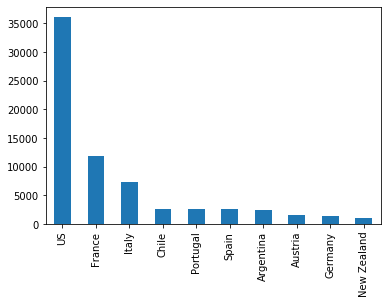

In [28]:
c=train['country'].value_counts()
c.head(10).plot.bar()
c.head(20)

England is at the bottom of the pool & 2nd guess could be the potential reason

#### Feature Engg.

In [29]:
train.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery', 'variety'],
      dtype='object')

In [30]:
test.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery'],
      dtype='object')

In [31]:
train_1 = train.drop(['user_name', 'review_title', 'review_description'], axis=1)
test_1 = test.drop(['user_name', 'review_title', 'review_description'], axis=1)

In [32]:
y_train = train_1['variety']
X_train = train_1.drop(columns=['variety'], axis=1)
X_train = X_train.fillna(-1)
X_train.columns

Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'winery'],
      dtype='object')

In [33]:
X_test = test_1
X_test = X_test.fillna(-1)
test_1['variety'] = ""
y_test = test_1['variety']
X_test.columns

Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'winery'],
      dtype='object')

In [34]:
# Lets also create a validation set within the training set to later see the result & tune hyper parameters
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, 
                                                    random_state=52)

In [35]:
print(X_train.columns)
print(X_test.columns)
print(X_valid.columns)
print(y_train)

Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'winery'],
      dtype='object')
Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'winery'],
      dtype='object')
Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'winery'],
      dtype='object')
46417    Cabernet Sauvignon
4729             Chardonnay
51388            Pinot Noir
62975           Tempranillo
4435             Pinot Gris
                ...        
60650            Chardonnay
58268           White Blend
69783            Chardonnay
56845                  Rosé
42652    Cabernet Sauvignon
Name: variety, Length: 57884, dtype: object


In [36]:
categorical_features_indices = np.where(X_train.dtypes != np.float)[0]
print('feature indices with categorical variables are {}'.format(categorical_features_indices))

feature indices with categorical variables are [0 1 2 4 5 6 7]


In [37]:
y_train.value_counts(normalize=True)

Pinot Noir                    0.132973
Chardonnay                    0.114522
Cabernet Sauvignon            0.097955
Red Blend                     0.088988
Bordeaux-style Red Blend      0.054955
Riesling                      0.051292
Sauvignon Blanc               0.049634
Syrah                         0.042171
Rosé                          0.032237
Merlot                        0.032047
Zinfandel                     0.029490
Malbec                        0.027002
Sangiovese                    0.024411
Nebbiolo                      0.024411
White Blend                   0.022908
Portuguese Red                0.022493
Sparkling Blend               0.020921
Tempranillo                   0.018554
Rhône-style Red Blend         0.014598
Pinot Gris                    0.013994
Cabernet Franc                0.013406
Champagne Blend               0.012646
Grüner Veltliner              0.011679
Pinot Grigio                  0.010763
Gewürztraminer                0.010331
Portuguese White         

CatBoostClassifier model with Multi Class loss function. Also computed are the prediction classes, probabilities, raw values, count of trees, best score

In [38]:
from catboost import Pool, CatBoostClassifier, cv


train_dataset = Pool(data=X_train,
                     label=y_train,
                     cat_features=categorical_features_indices)

eval_dataset = Pool(data=X_valid,
                    label=y_valid,
                    cat_features=categorical_features_indices)

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=50,
                           learning_rate=1,
                           depth=2,
                           loss_function='MultiClass')

# Fit model
model.fit(train_dataset, use_best_model=True, eval_set=eval_dataset)
# Get predicted classes
preds_class = model.predict(eval_dataset)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(eval_dataset)
# Get predicted RawFormulaVal
preds_raw = model.predict(eval_dataset, 
                          prediction_type='RawFormulaVal')
"""model.fit(train_dataset,
          use_best_model=True,
          eval_set=eval_dataset)"""

print("Count of trees in model = {}".format(model.tree_count_))

0:	learn: 3.7650216	test: 3.6441376	best: 3.6441376 (0)	total: 1.95s	remaining: 1m 35s
1:	learn: 38.7581644	test: 37.7715542	best: 3.6441376 (0)	total: 3.42s	remaining: 1m 22s
2:	learn: 432.7383794	test: 412.6205719	best: 3.6441376 (0)	total: 4.91s	remaining: 1m 16s
3:	learn: 762.6052768	test: 745.9041335	best: 3.6441376 (0)	total: 6.45s	remaining: 1m 14s
4:	learn: 497.1233748	test: 480.0276594	best: 3.6441376 (0)	total: 7.93s	remaining: 1m 11s
5:	learn: 797.2052113	test: 760.5516135	best: 3.6441376 (0)	total: 9.64s	remaining: 1m 10s
6:	learn: 565.4984219	test: 546.1102810	best: 3.6441376 (0)	total: 12.3s	remaining: 1m 15s
7:	learn: 375.6637654	test: 348.9201644	best: 3.6441376 (0)	total: 14.5s	remaining: 1m 16s
8:	learn: 874.2912215	test: 844.4847905	best: 3.6441376 (0)	total: 16.7s	remaining: 1m 16s
9:	learn: 857.4543859	test: 832.3641772	best: 3.6441376 (0)	total: 19s	remaining: 1m 16s
10:	learn: 680.3517317	test: 664.3520823	best: 3.6441376 (0)	total: 21.4s	remaining: 1m 15s
11:	le

In [39]:
print(model.get_best_score())

{'learn': {'MultiClass': 3.76502158218775}, 'validation': {'MultiClass': 3.6441376281106783}}


In [40]:
preds_class

array([['Red Blend'],
       ['Cabernet Sauvignon'],
       ['Riesling'],
       ...,
       ['Cabernet Sauvignon'],
       ['Cabernet Sauvignon'],
       ['Cabernet Sauvignon']], dtype=object)

In [41]:
model.score(X_valid, y_valid)

0.2582918739635158

In [42]:
model.score(X_train, y_train)

0.2577396171653652

In [43]:
"""cv_dataset = Pool(data=X_train,
                  label=y_train,
                  cat_features=categorical_features_indices)

params = {"iterations": 100,
          "depth": 2,
          "loss_function": "MultiClass",
          "verbose": False}

scores = cv(cv_dataset,
            params,
            fold_count=2, 
            plot="True")
            
import catboost
w = catboost.MetricVisualizer('/', subdirs=True)
w.start()"""

'cv_dataset = Pool(data=X_train,\n                  label=y_train,\n                  cat_features=categorical_features_indices)\n\nparams = {"iterations": 100,\n          "depth": 2,\n          "loss_function": "MultiClass",\n          "verbose": False}\n\nscores = cv(cv_dataset,\n            params,\n            fold_count=2, \n            plot="True")\n            \nimport catboost\nw = catboost.MetricVisualizer(\'/\', subdirs=True)\nw.start()'

In [44]:
train.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery', 'variety'],
      dtype='object')

In [45]:
nw_X_train = train_1.drop(columns = ['variety'], axis=1)
nw_X_train.fillna(-1, inplace=True)
nw_y_train = train_1['variety']
nw_X_test = test_1
nw_X_test.fillna(-1, inplace=True)

Final model running on combined training & validation data to predict label in the test set. This time with 50 Iterations.

In [46]:
print(nw_X_train.columns)
print(nw_X_test.columns)
print(nw_y_train)

Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'winery'],
      dtype='object')
Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'winery', 'variety'],
      dtype='object')
0                        Chardonnay
1                         Red Blend
2                          Nebbiolo
3        Bordeaux-style White Blend
4                            Malbec
                    ...            
72351                    Chardonnay
72352                   Tempranillo
72353            Cabernet Sauvignon
72354                         Gamay
72355            Cabernet Sauvignon
Name: variety, Length: 72356, dtype: object


In [47]:
nw_X_train.dtypes

country         object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
winery          object
dtype: object

In [48]:
from catboost import Pool, CatBoostClassifier, cv

train_dataset = Pool(data=nw_X_train,
                     label=nw_y_train,
                     cat_features=[0,1,4,5,6,7])

#eval_dataset = Pool(data=nw_X_test,
#                    label=nw_y_test,
#                    cat_features=[0,1,4,5,6,7])

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=50,
                           learning_rate=1,
                           depth=2,
                           loss_function='MultiClass')

# Fit model
model.fit(train_dataset)
# Get predicted classes
preds_class = model.predict(nw_X_test)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(nw_X_test)
# Get predicted RawFormulaVal
preds_raw = model.predict(nw_X_test, 
                          prediction_type='RawFormulaVal')
"""model.fit(train_dataset,
          use_best_model=True,
          eval_set=eval_dataset)"""

print("Count of trees in model = {}".format(model.tree_count_))

0:	learn: 3.5066061	total: 2.88s	remaining: 2m 21s
1:	learn: 33.8973523	total: 5.57s	remaining: 2m 13s
2:	learn: 362.9230371	total: 7.36s	remaining: 1m 55s
3:	learn: 322.3199543	total: 9.37s	remaining: 1m 47s
4:	learn: 458.3849361	total: 11.3s	remaining: 1m 42s
5:	learn: 473.8651342	total: 13.3s	remaining: 1m 37s
6:	learn: 606.3883202	total: 15.3s	remaining: 1m 34s
7:	learn: 1419.4725784	total: 17.3s	remaining: 1m 30s
8:	learn: 2815.2857674	total: 19.4s	remaining: 1m 28s
9:	learn: 4420.1161303	total: 21.6s	remaining: 1m 26s
10:	learn: 4224.2123651	total: 23.5s	remaining: 1m 23s
11:	learn: 4431.0845202	total: 25.7s	remaining: 1m 21s
12:	learn: 4701.7880142	total: 27.6s	remaining: 1m 18s
13:	learn: 4425.5196107	total: 29.6s	remaining: 1m 16s
14:	learn: 4814.3239805	total: 31.5s	remaining: 1m 13s
15:	learn: 5097.3137335	total: 33.5s	remaining: 1m 11s
16:	learn: 5315.9357740	total: 35.5s	remaining: 1m 8s
17:	learn: 4764.5575167	total: 37.4s	remaining: 1m 6s
18:	learn: 4662.3597185	total: 3

In [49]:
preds_class

array([['Bordeaux-style Red Blend'],
       ['Red Blend'],
       ['Red Blend'],
       ...,
       ['Pinot Grigio'],
       ['Riesling'],
       ['Pinot Grigio']], dtype=object)

In [50]:
test['variety'] = pd.DataFrame(preds_class)
test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Bordeaux-style Red Blend
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards,Red Blend
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime,Red Blend
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio,Red Blend
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole,Riesling


In [51]:
train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [52]:
train.to_csv('knight_ML_project_training_dataset.csv')
test.to_csv('knight_ML_project_testing_dataset.csv')

#  Thanks for your time in reading this notebook.